### Умова (варіант 29):
Знайти найбiльший корiнь нелiнiйного рiвняння $3x − cos x − 1 = 0$ за допомогою iнтерполяцiї (використати iнтерполяцiйний полiноми Лагранжа та Ньютона, побудованого за 10 рiвно вiддаленими вузлами)

Побудуємо графік функції

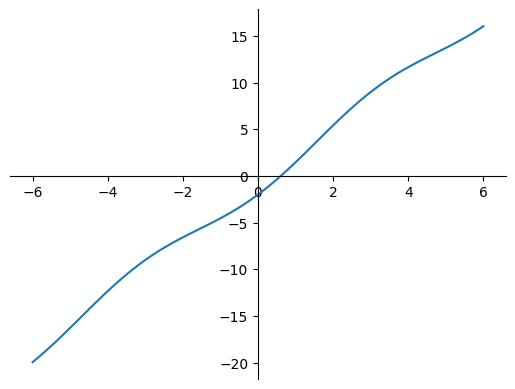

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial as P

def f(x):
    return 3*x - np.cos(x) - 1

def plot(x, y):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.plot(x, y)

x = np.linspace(-6,6, 100)
y = f(x)
plot(x, y)


Перевіримо, що корінь знаходиться на проміжку $[-3, 7]$. 10 інтерполяційних вузлів будуть рівномірно розподілені на цьому проміжку

In [2]:
a = -3
b = 7
print("f(a) = ", f(a))
print("f(b) = ", f(b))

xk = np.arange(a, b)
fxk = np.array(f(xk))

f(a) =  -9.010007503399555
f(b) =  19.246097745656694


### Метод Лагранжа

(0.6071100864879485+0j)


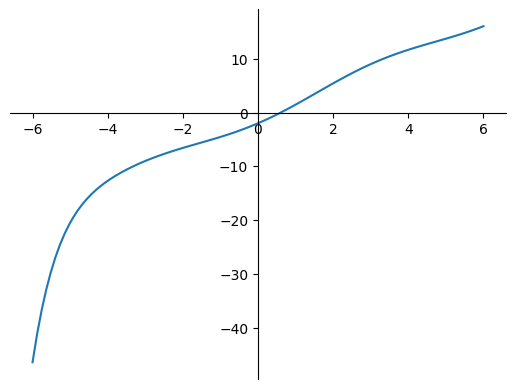

In [3]:
def numerator(i, c = 0):
    if c >= xk.size:
        return 1
    n = numerator(i, c + 1)
    if c == i:
        return n
    return P([ -xk[c], 1]) * n

def denominator(i, c = 0):
    if c >= xk.size:
        return 1
    if c == i:
        return denominator(i, c + 1)
    return (xk[i] - xk[c]) * denominator(i, c + 1)

def partialPolynomial(i):
    return  numerator(i) / denominator(i)

def lagrange():
    polynomial = fxk[0] * partialPolynomial(0)
    for i in range(1, xk.size):
        polynomial += fxk[i] * partialPolynomial(i)

    roots = polynomial.roots()
    maxRoot = np.max(roots[np.isreal(roots)])
    return maxRoot, polynomial

root, polynomial = lagrange()
print(root)

[x, y] = polynomial.linspace(100, [-6, 6])
plot(x, y)

### Метод Ньютона

(0.6071100864879485+0j)


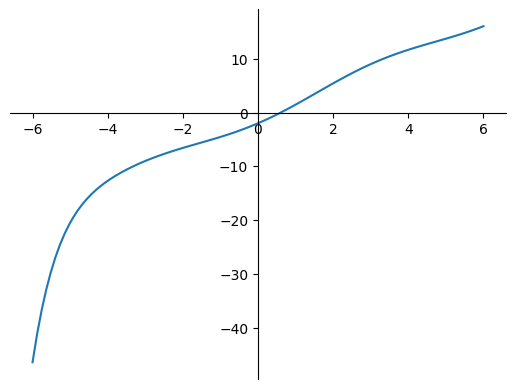

In [4]:
def polynomials():
    arr = [P([-xk[0], 1])]
    for i in range(1, xk.size - 1):
        arr.append(arr[i - 1] * P([-xk[i], 1]))
    return arr

def nuton():
    table = [fxk]
    for i in np.arange(1, xk.size):
        arr = np.zeros(xk.size - i)
        parr  = table[i - 1]
        for j in range(0, parr.size - 1):
            arr[j] = (parr[j + 1] - parr[j]) / (xk[i + j] - xk[j])
        table.append(arr)

    arr = polynomials()
    polinomial = P([fxk[0]])
    for i in range(0, len(arr)):
        polinomial += table[i + 1][0] * arr[i]

    roots = polinomial.roots()
    maxRoot = np.max(roots[np.isreal(roots)])
    return maxRoot, polinomial

root, polinomial = nuton()
print(root)

[x, y] = polynomial.linspace(100, [-6, 6])
plot(x, y)